<font face="黑体" size=5>月度产销差漏损率分析报告图表</font> 

***author: 谢杰***<br/>

In [2]:
#调入常用包
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
mpl.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
import sys
import os
#查看当前目录
os.getcwd()

'C:\\Users\\XieJie\\mypyworks\\jupyter文件'

In [2]:
penguins = sns.load_dataset("penguins")

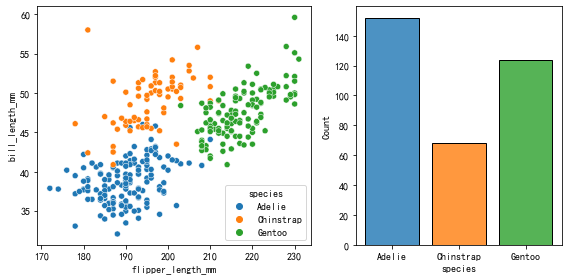

In [10]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()


In [4]:
import pyecharts
print(pyecharts.__version__)

1.9.0


In [76]:
#水量平衡表旭日图
from pyecharts.charts import Sunburst
from pyecharts import options as opts
data = [
    opts.SunburstItem(
        name="注册用水量",                                #第1层级
        children=[
            opts.SunburstItem(                       #1.1层级
                name="计费用水",                
                children=[
                    opts.SunburstItem(name="计量用水", value=1187494203),#1.1.1层级
                    opts.SunburstItem(name="未计量用水",value=53351685)
                    
                ],
            ),
            opts.SunburstItem(
                name="免费用水", #1.2层级               
                children=[
                    opts.SunburstItem(name="计量", value=0),
                    opts.SunburstItem(name="未计量", value=118913235),
                ],
            ),
        ],
    ),
    opts.SunburstItem(
        name="漏损水量",                                                  #第2层级
        children=[
            opts.SunburstItem(
                name="漏失",
                children=[
                    opts.SunburstItem(name="明漏", value=0),
                    opts.SunburstItem(name="暗漏", 
                                     children=[
                                        opts.SunburstItem(name="主动检出暗漏点", value=0),#1.1.1层级
                                        opts.SunburstItem(name="其它",value=174714223.66)
                                     ]                    
                                     ),
                    opts.SunburstItem(name="水箱、水池的\n渗漏和溢流", value=0),
                ],
            ),
            opts.SunburstItem(
                name="计量",
                children=[
                    opts.SunburstItem(name="总分表差", value=43661780),
                    opts.SunburstItem(name="表具误差", value=8504039.48),
                ],
            ),
            opts.SunburstItem(
                name="其他",
                children=[                    
                    opts.SunburstItem(name="未注册用户和用户拒查", value=17681498.86),
                ],
            )
        ],
    ),
]

sunburst = (
    Sunburst(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add(series_name="", data_pair=data, radius=['10%', "95%"],
        highlight_policy="descendant",
        sort_="null",
        levels=[
            {},
            {"itemStyle": {"borderWidth": 2},"label": {"rotate": "tangential"}, },
            {},
            { "label": { "padding": 1, "silent": False}, "label": {"align": "left"},
                "itemStyle": {"borderWidth": 2},
            },
            { "label": { "padding": 1, "silent": False},
                "itemStyle": {"borderWidth": 2},
            }
        ],)
    .set_global_opts(title_opts=opts.TitleOpts(title="水量平衡表细项比例示意图"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    
)
sunburst.render_notebook()

In [95]:
data = [
    {
        "name": "注册用水量",        
        "children": [
            {"name": "计费用水",
                 "children": [                    
                        {"name": "计量用水", "value": 1187494203, },
                        {"name": "未计量用水", "value": 53351685, },
                    ],
            },
            { "name": "免费用水", "itemStyle": {"color": "#794752"},             
                "children": [                    
                    {"name": "计量", "value": 0,"itemStyle": {"color": "#794752"}, },
                    {"name": "未计量", "value": 118913235,"itemStyle": {"color": "#794752"},},
                ],
            },
        ],
    },
    {
        "name": "漏损水量",        
        "children": [
            {
                "name": "漏失",               
                "children": [
                    {
                        "name": "明漏",
                        "value": 0,                       
                    },
                    {
                        "name": "暗漏",
                             "children": [                    
                                {"name": "主动检出暗漏点", "value": 0, },
                                {"name": "其它", "value": 174714223.66, },
                            ],
                       
                    },
                    {
                        "name": "水箱、水池的\n渗漏和溢流",
                        "value": 0,                        
                    },                    
                ],
            },
            {
                "name": "计量误差",                
                "children": [
                    {"name": "总分表差", "value": 43661780},
                    {"name": "表具误差", "value": 8504039.48,},
                ],
            },
            {
                "name": "其他",               
                "children": [
                    {"name": "未注册用户和用户拒查", "value": 17681498.86, },
                    
                ],
            },            
        ],
    },
    
]

sunburst = (
    Sunburst(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add(series_name="", data_pair=data, radius=['10%', "95%"],
        highlight_policy="descendant",
        sort_="null",
        levels=[
            {},
            {"itemStyle": {"borderWidth": 2},"label": {"rotate": "tangential"}, },
            {},
            { "label": { "padding": 1, "silent": False}, "label": {"align": "left"},
                "itemStyle": {"borderWidth": 2},
            },
            { "label": { "padding": 1, "silent": False},
                "itemStyle": {"borderWidth": 2},
            }
        ],)
    .set_global_opts(title_opts=opts.TitleOpts(title="水量平衡表细项比例示意图"),
                     toolbox_opts=opts.ToolboxOpts(),
                     init_opts=opts.InitOpts(bg_color= None,))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    
    
)
sunburst.render_notebook()

TypeError: set_global_opts() got an unexpected keyword argument 'init_opts'